In [1]:
# imports

import torch
from torch_geometric.data import Data
from torch_geometric.transforms import BaseTransform
from torch_geometric.datasets import TUDataset, ZINC
from ogb.graphproppred import PygGraphPropPredDataset

import numpy as np
import matplotlib.pyplot as plt
import itertools

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [3]:
import lib.experiments as experiments

In [4]:
from importlib import reload 

experiments = reload(experiments)

### Helper functions for plots

In [5]:
# make plots functions
def make_tree_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape((8,5))
  n_trees = range(2,7)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_trees, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max tree size')
  ax.set_ylabel('test accuracy')
  plt.show()


def make_cycle_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(8,5).transpose().reshape(10,4)
  n_cycles = range(3,7)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_cycles, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max cycle size')
  ax.set_ylabel('test accuracy')
  plt.show()

def make_clique_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(2,20).transpose()
  n_cliques = range(4,6)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_cliques, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max clique size')
  ax.set_ylabel('test accuracy')
  plt.show()

def make_big_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  fig, (ax_trees, ax_cycles, ax_cliques) = plt.subplots(3, gridspec_kw={'hspace': 1.2})

  tree_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape((8,5))
  cycle_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(8,5).transpose().reshape(10,4)
  clique_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(2,20).transpose()
  
  n_trees = range(2,7)
  n_cycles = range(3,7)
  n_cliques = range(4,6)

  [ax_trees.plot(n_trees, tree_scores[i]) for i in range(8)]
  ax_trees.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax_trees.set_xlabel('Max tree size')
  ax_trees.set_ylabel('test accuracy')

  [ax_cycles.plot(n_cycles, cycle_scores[i]) for i in range(10)]
  ax_cycles.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax_cycles.set_xlabel('Max cycle size')
  ax_cycles.set_ylabel('test accuracy')

  [ax_cliques.plot(n_cliques, clique_scores[i]) for i in range(10)]
  ax_cliques.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax_cliques.set_xlabel('Max clique size')
  ax_cliques.set_ylabel('test accuracy')

  fig.set_dpi(100)
  plt.show()





## load experiment data

### MUTAG

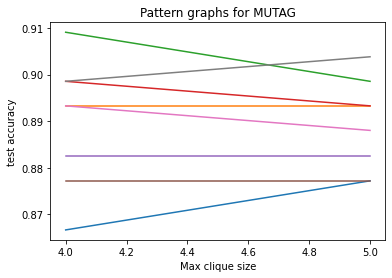

In [6]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/MUTAG', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'MUTAG')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
make_clique_plot(experiment)

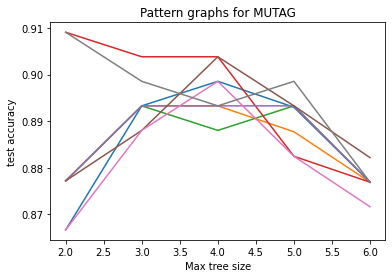

In [40]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/MUTAG', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'MUTAG')
make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)

### NCI1

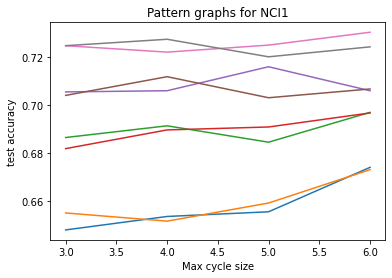

In [45]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
#make_tree_plot(experiment)
make_cycle_plot(experiment)
#make_clique_plot(experiment)

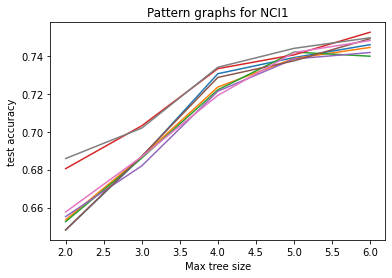

In [16]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)

### PROTEINS


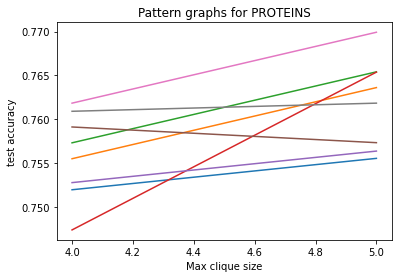

In [49]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/PROTEINS', 
              encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'PROTEINS')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
make_clique_plot(experiment)

lagrangian:

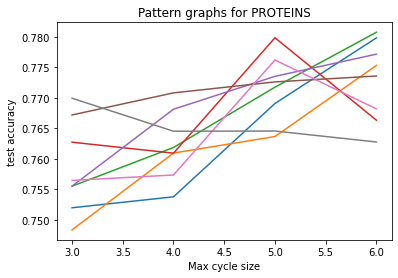

In [52]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/PROTEINS', 
              encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'PROTEINS')
#make_tree_plot(experiment)
make_cycle_plot(experiment)
#make_clique_plot(experiment)

### ogbg-molhiv

In [ ]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/ogbg-molhiv', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6)
#experiment.evaluation(clf_name='Random_forest', cv_num = 10, scoring='roc_auc')

# drafts

In [82]:
x = torch.tensor([[1, 1, 0, 0], [1, 0, 2, 0], [1, 0, 0, 3]])

In [112]:
single_index = torch.tensor([0,1,2,3])
indx_tensor = torch.combinations(torch.arange(4), 2, with_replacement=True).t().tolist()
edge_embd = [1,2]
i_array = list(zip(edge_embd, indx_tensor))
i_array

[(1, [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), (2, [0, 1, 2, 3, 1, 2, 3, 2, 3, 3])]

In [113]:
torch.stack([x[i] for i in i_array])

tensor([[1, 1, 1, 1, 0, 0, 0, 2, 2, 0],
        [1, 0, 0, 3, 0, 0, 3, 0, 3, 3]])

In [114]:
yy = torch.stack([torch.stack([x[i] for i in i_array]),torch.stack([x[i] for i in i_array])])
yy

tensor([[[1, 1, 1, 1, 0, 0, 0, 2, 2, 0],
         [1, 0, 0, 3, 0, 0, 3, 0, 3, 3]],

        [[1, 1, 1, 1, 0, 0, 0, 2, 2, 0],
         [1, 0, 0, 3, 0, 0, 3, 0, 3, 3]]])

In [115]:
torch.prod(yy, dim = 1)

tensor([[1, 0, 0, 3, 0, 0, 0, 0, 6, 0],
        [1, 0, 0, 3, 0, 0, 0, 0, 6, 0]])

In [116]:
torch.prod(torch.stack([x[i] for i in i_array]), dim = 0)

tensor([1, 0, 0, 3, 0, 0, 0, 0, 6, 0])

In [34]:
maybe = torch.stack([aug_x[i, idt] for i,idt in enumerate(indx_tensor)])
torch.prod(maybe, dim = 0)

tensor([1.0000, 2.0000, 2.1000, 2.2000, 2.0000, 2.1000, 2.2000, 2.3100, 2.4200,
        2.6400, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2310, 0.2420,
        0.2640, 0.5280])

In [35]:
torch.prod(maybe.t(), dim = -1).contiguous()

tensor([1.0000, 2.0000, 2.1000, 2.2000, 2.0000, 2.1000, 2.2000, 2.3100, 2.4200,
        2.6400, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2310, 0.2420,
        0.2640, 0.5280])

In [19]:
aug_x.size(), indx_tensor.size()
indx_tensor2 = indx_tensor.clone()

(torch.Size([3, 4]), torch.Size([3, 20]))

In [26]:
tuple(torch.arange(4).tolist())

(0, 1, 2, 3)

In [30]:
a = torch.tensor([[10, 3]])
b = torch.arange()

tensor(0.)

In [118]:
list(a.size())

[3, 3]